<a href="https://colab.research.google.com/github/Halkas6974/test3/blob/main/6%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 20)

plt.rcParams['font.family'] = 'NanumGothic'

In [15]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import FinanceDataReader as fdr

In [17]:
# KOSPI index, 2015 ~ Now
ks11 = fdr.DataReader('KS11', '2015-01-01')


In [18]:
ks11.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-07-08,2350.61,2352.49,2367.84,2348.74,411420000.0,0.0070
2022-07-11,2340.27,2357.43,2363.26,2337.82,377110000.0,-0.0044
2022-07-12,2317.76,2330.88,2333.02,2303.74,379310000.0,-0.0096
2022-07-13,2328.61,2324.45,2341.19,2312.49,303140.0,0.0047
2022-07-14,2330.73,2316.41,2332.16,2307.69,218660.0,0.0009


In [19]:
STOCK_CODE = 'ks11'

In [20]:
stock = fdr.DataReader(STOCK_CODE)

In [21]:
stock.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [22]:
stock.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-07-08,2350.61,2352.49,2367.84,2348.74,411420000.0,0.0070
2022-07-11,2340.27,2357.43,2363.26,2337.82,377110000.0,-0.0044
2022-07-12,2317.76,2330.88,2333.02,2303.74,379310000.0,-0.0096
2022-07-13,2328.61,2324.45,2341.19,2312.49,303140.0,0.0047
2022-07-14,2331.80,2316.41,2332.16,2307.69,218820.0,0.0014


In [23]:
stock.index

DatetimeIndex(['1981-05-01', '1981-05-02', '1981-05-04', '1981-05-06',
               '1981-05-07', '1981-05-08', '1981-05-09', '1981-05-12',
               '1981-05-13', '1981-05-14',
               ...
               '2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14'],
              dtype='datetime64[ns]', name='Date', length=10991, freq=None)

In [24]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [25]:
stock.head()

,Close,Open,High,Low,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,1981,5,1
1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,1981,5,2
1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,1981,5,4
1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,1981,5,6
1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,1981,5,7


Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


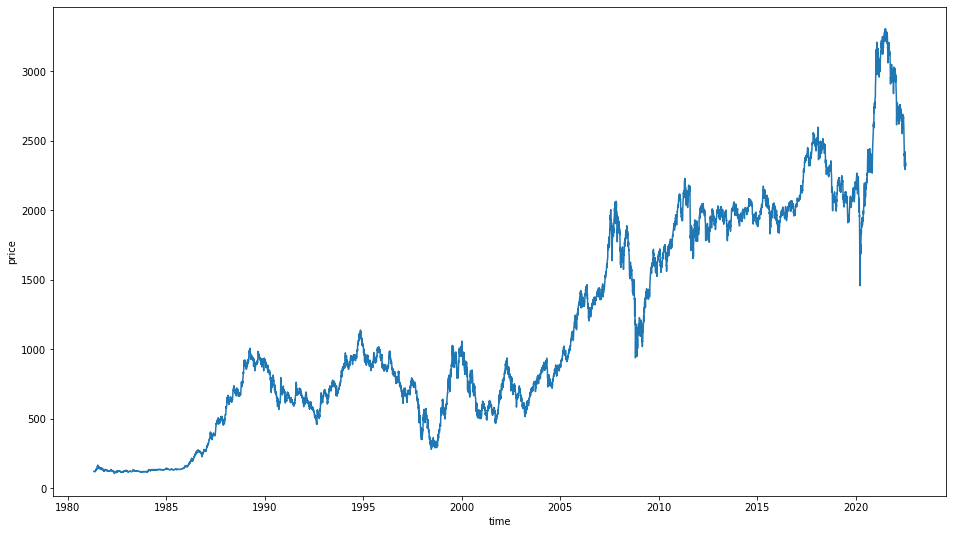

In [26]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


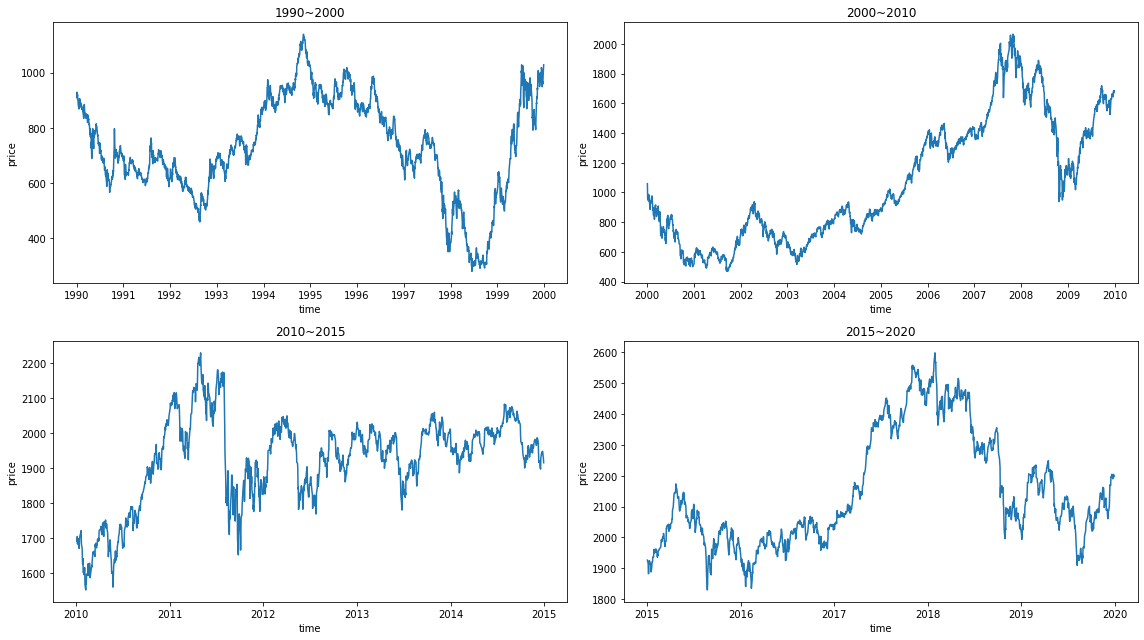

In [27]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax) 
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 


scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']


scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[5.50403661e-03, 5.48582750e-03, 5.52132813e-03, 5.50446671e-03,
        9.14494742e-04],
       [5.47278143e-03, 5.45467573e-03, 5.48997476e-03, 5.47320909e-03,
        5.41644484e-04],
       [4.56638131e-03, 4.55127426e-03, 4.58072708e-03, 4.56673814e-03,
        5.09851051e-04],
       ...,
       [6.95393300e-01, 6.93759365e-01, 6.89068648e-01, 6.91346641e-01,
        1.09584448e-01],
       [6.93383592e-01, 6.96304465e-01, 6.91812068e-01, 6.94738092e-01,
        3.96377398e-05],
       [6.90870675e-01, 6.93491460e-01, 6.90307106e-01, 6.95735210e-01,
        1.52666284e-05]])

In [29]:
df = pd.DataFrame(scaled, columns=scale_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10991 entries, 0 to 10990
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10991 non-null  float64
 1   High    10991 non-null  float64
 2   Low     10991 non-null  float64
 3   Close   10991 non-null  float64
 4   Volume  10991 non-null  float64
dtypes: float64(5)
memory usage: 429.5 KB


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [32]:
x_train.shape, y_train.shape

((8792, 4), (8792,))

In [33]:
x_test.shape, y_test.shape

((2199, 4), (2199,))

In [34]:
x_train

,Open,High,Low,Volume
0,0.005504,0.005486,0.005521,0.000914
1,0.005473,0.005455,0.005490,0.000542
2,0.004566,0.004551,0.004581,0.000510
3,0.004598,0.004582,0.004612,0.000440
4,0.004160,0.004146,0.004173,0.000380
...,...,...,...,...
8787,0.563428,0.562782,0.562175,0.097526
8788,0.561309,0.564196,0.562652,0.105992
8789,0.565556,0.565283,0.565875,0.110980
8790,0.565897,0.566754,0.564596,0.097084


In [35]:
import tensorflow as tf

In [36]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [37]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [38]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [39]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [41]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [42]:
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [43]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    270/Unknown - 6s 13ms/step - loss: 8.7147e-05 - mse: 1.7429e-04
Epoch 1: val_loss improved from inf to 0.00087, saving model to tmp/ckeckpointer.ckpt
275/275 [==============================] - 8s 18ms/step - loss: 8.8761e-05 - mse: 1.7752e-04 - val_loss: 8.7400e-04 - val_mse: 0.0017
Epoch 2/50
273/275 [============================>.] - ETA: 0s - loss: 4.3943e-05 - mse: 8.7885e-05
Epoch 2: val_loss improved from 0.00087 to 0.00047, saving model to tmp/ckeckpointer.ckpt
275/275 [==============================] - 4s 15ms/step - loss: 4.4099e-05 - mse: 8.8198e-05 - val_loss: 4.6888e-04 - val_mse: 9.3776e-04
Epoch 3/50
274/275 [============================>.] - ETA: 0s - loss: 4.2629e-05 - mse: 8.5258e-05
Epoch 3: val_loss improved from 0.00047 to 0.00035, saving model to tmp/ckeckpointer.ckpt
275/275 [==============================] - 5s 18ms/step - loss: 4.2612e-05 - mse: 8.5223e-05 - val_loss: 3.5231e-04 - val_mse: 7.0463e-04
Epoch 4/50
274/275 [===========================

In [44]:
model.load_weights(filename)

In [45]:
pred = model.predict(test_data)

In [46]:
pred.shape

(2179, 1)

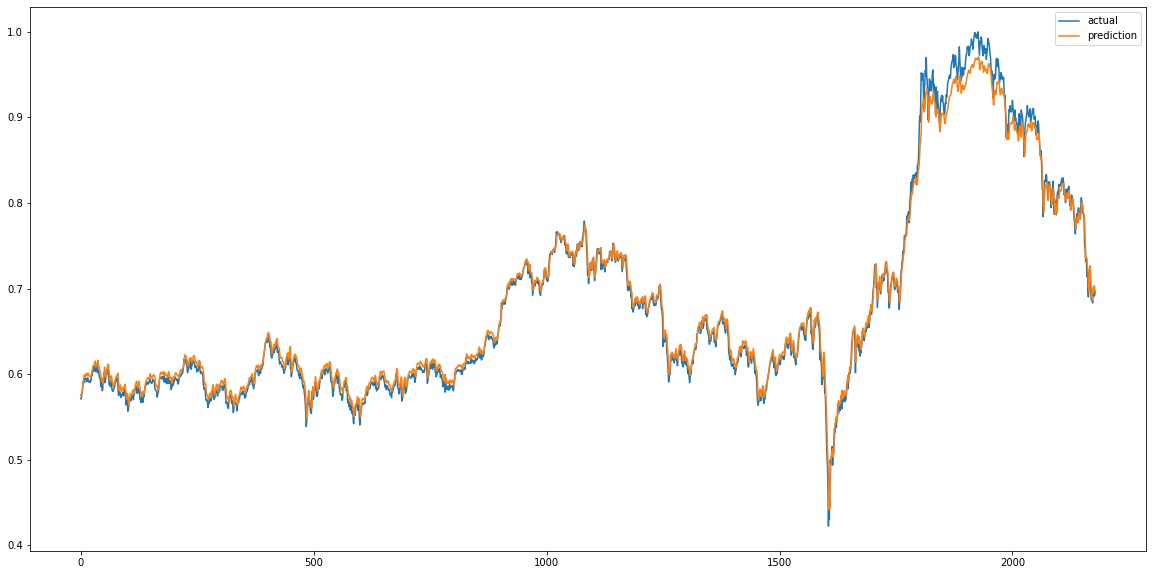

In [47]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()